<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task 3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 4</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task 6</a></span></li></ul></div>

In [1]:
import pandas as pd
from io import StringIO
import requests
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt

#Define functions to load csv from gitlab
URL_BASE = 'https://git.imp.fu-berlin.de/mlds-team/mlds-2020/-/raw/master/Assignment%202/'
def load_csv_from(url):
  return pd.read_csv(StringIO(requests.get(url).text), index_col=0)

def load_csv_from_gitlab(csv_name, url_base=URL_BASE):
  return load_csv_from(URL_BASE + csv_name)

In [2]:
#load csv
fifaframe = load_csv_from_gitlab("_sources/fifa.csv")
print(fifaframe.shape)

positions = list(pd.unique(fifaframe["Position"]))
poscount = fifaframe.groupby(["Position"]).count()["ID"]
print(poscount)
print(positions)
positions = positions[0:-1]
print(positions)
print(sum(poscount))

(18207, 88)
Position
CAM     958
CB     1778
CDM     948
CF       74
CM     1394
GK     2025
LAM      21
LB     1322
LCB     648
LCM     395
LDM     243
LF       15
LM     1095
LS      207
LW      381
LWB      78
RAM      21
RB     1291
RCB     662
RCM     391
RDM     248
RF       16
RM     1124
RS      203
RW      370
RWB      87
ST     2152
Name: ID, dtype: int64
['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan]
['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']
18147


# Task 3

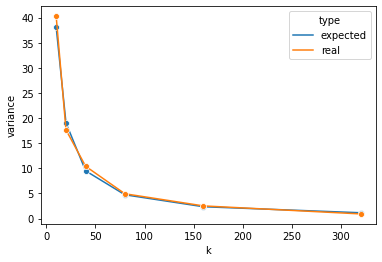

In [13]:
def expected_mean_variance(df, ks):
    N = len(df['Finishing'])
    var = df['Finishing'].var()
    expected_var = lambda k: var / k * (1 - (k - 1) / (N - 1))
    return np.array([expected_var(k) for k in ks])

def real_mean_variance(df, ks, n=100):
    sample_mean = lambda k: df['Finishing'].sample(k).mean()
    sample_n_times = lambda k, n: pd.Series([sample_mean(k) for i in range(n)])
    mean_variance = lambda ks: pd.DataFrame({k: sample_n_times(k, n) for k in ks}).var().to_numpy()
    return mean_variance(ks)

ks = [10, 20, 40, 80, 160, 320]

smv = pd.DataFrame({'variance': np.concatenate([expected_mean_variance(fifaframe, ks), real_mean_variance(fifaframe, ks)]), 
                    'type': np.array(['expected'] * len(ks) + ['real'] * len(ks)),
                    'k': np.array(ks * 2)})

sns.lineplot(data=smv, x='k', y='variance', hue='type', marker="o")

In [21]:
ks_2 = [0.01, 0.02, 0.05, 0.1]
ks_num = [round(elem * int(fifaframe.shape[0])) for elem in ks_2]
print(ks_num)

[182, 364, 910, 1821]


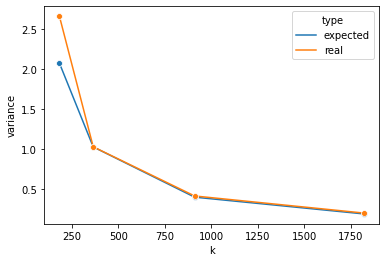

In [22]:
smv_2 = pd.DataFrame({'variance': np.concatenate([expected_mean_variance(fifaframe, ks_num), real_mean_variance(fifaframe, ks_num)]), 
                    'type': np.array(['expected'] * len(ks_num) + ['real'] * len(ks_num)),
                    'k': np.array(ks_num * 2)})

sns.lineplot(data=smv_2, x='k', y='variance', hue='type', marker="o")

In [23]:
smv_2["variance"]

0    2.073996
1    1.026527
2    0.398046
3    0.188437
4    2.660310
5    1.027672
6    0.412898
7    0.199365
Name: variance, dtype: float64

# Task 4

In [17]:
def annotate_boxplot(bpdict, annotate_params=None,
                     x_offset=0.05, x_loc=0,
                     text_offset_x=35,
                     text_offset_y=20):
    """Annotates a matplotlib boxplot with labels marking various centile levels.

    Parameters:
    - bpdict: The dict returned from the matplotlib `boxplot` function. If you're using pandas you can
    get this dict by setting `return_type='dict'` when calling `df.boxplot()`.
    - annotate_params: Extra parameters for the plt.annotate function. The default setting uses standard arrows
    and offsets the text based on other parameters passed to the function
    - x_offset: The offset from the centre of the boxplot to place the heads of the arrows, in x axis
    units (normally just 0-n for n boxplots). Values between around -0.15 and 0.15 seem to work well
    - x_loc: The x axis location of the boxplot to annotate. Usually just the number of the boxplot, counting
    from the left and starting at zero.
    text_offset_x: The x offset from the arrow head location to place the associated text, in 'figure points' units
    text_offset_y: The y offset from the arrow head location to place the associated text, in 'figure points' units
    """
    if annotate_params is None:
        annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})

    plt.annotate('Median', (x_loc + 1 + x_offset, bpdict['medians'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('25%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('75%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[2]), **annotate_params)
    plt.annotate('5%', (x_loc + 1 + x_offset, bpdict['caps'][x_loc*2].get_ydata()[0]), **annotate_params)
    plt.annotate('95%', (x_loc + 1 + x_offset, bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), **annotate_params)

27 different positions in dataset. 60 players without positional information.

0
1
2
3


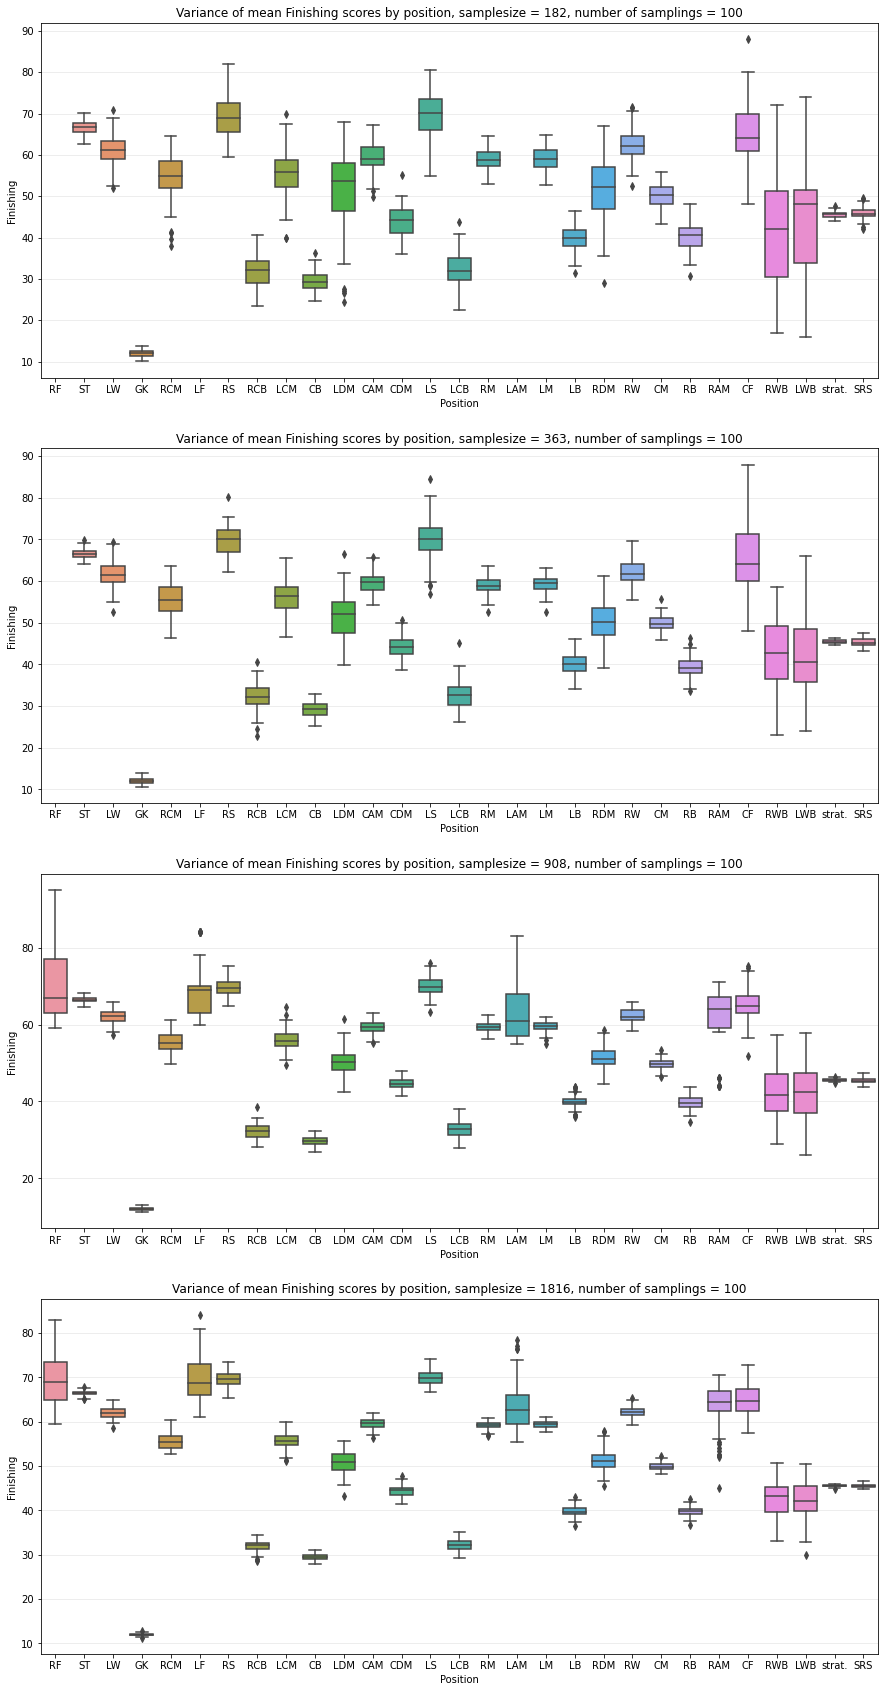

In [18]:


size = 0.02
value = "Finishing"
iter = 100



#only keep lines that contains value
fifaframe_fin = fifaframe[fifaframe.notnull()[value]]

#mean_values = np.empty((len(positions) + 2, iter))
ks = [0.01, 0.02, 0.05, 0.1]

variance_df = pd.DataFrame()

fig, axs = plt.subplots(len(ks),1, figsize = (15,30))

for j in range(len(ks)):
  size = ks[j]
  mean_values = np.empty((len(positions) + 2, iter))

  for i in range(iter):
    all_samples = pd.DataFrame()

    for counter in range(len(positions)):
      pos = positions[counter]
      df = fifaframe_fin[fifaframe_fin["Position"] == pos]

      samples = df.shape[0]
      samplesize = round(samples*size)

      sdf = df.sample(samplesize)
      mean_val = (sdf[value]).mean()
      mean_values[counter, i] = mean_val

      all_samples = all_samples.append(sdf)

    total_mean = (all_samples[value]).mean()
    mean_values[counter + 1, i] = total_mean

    samples = fifaframe_fin.shape[0]
    samplesize = round(samples*size)
    
    tot_sample = fifaframe_fin.sample(samplesize)
    total_sample_mean = (tot_sample[value]).mean()
    mean_values[counter + 2, i] = total_sample_mean
  labels = positions + ["strat.", "SRS"]
  resultsdf = pd.DataFrame(mean_values.T, columns = labels)


  variance_df[size] = resultsdf.var()

  print(j)

  axs[j] = sns.boxplot( data = resultsdf, ax = axs[j])

  axs[j].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                alpha=0.5)
  axs[j].set_axisbelow(True)
  axs[j].set_title('Variance of mean {} scores by position, samplesize = {}, number of samplings = {}'.format(value, samplesize, iter))
  axs[j].set_xlabel('Position')
  axs[j].set_ylabel(value)



Text(0, 0.5, 'mean Finishing variance')

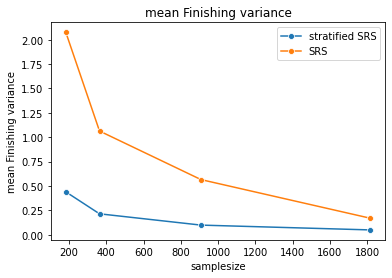

In [24]:
ks_num = [round(elem * int(fifaframe_fin.shape[0])) for elem in ks]
var = variance_df.T
fig, axs =  plt.subplots()
sns.lineplot(x = ks_num, y = var["strat."], label = "stratified SRS", marker = "o")
sns.lineplot(x = ks_num, y = var["SRS"], label = "SRS", marker = "o")
axs.set_axisbelow(True)
axs.set_title('mean {} variance'.format(value))
axs.set_xlabel("samplesize")
axs.set_ylabel("mean {} variance".format(value))

In [25]:
variance_df

0.01        0.02        0.05       0.10
RF             NaN         NaN  113.977374  31.044924
ST        2.474574    1.416102    0.542997   0.251225
LW       12.835069    8.706154    3.164929   1.344910
GK        0.719607    0.457824    0.159676   0.068419
RCM      30.013100   13.998540    5.758025   3.074750
LF             NaN         NaN   51.125152  23.073207
RS       21.012399   14.030372    4.265304   2.395979
RCB      14.539458    9.911329    3.490662   1.259217
LCM      31.065303   13.992576    6.704293   2.763581
CB        5.415044    3.097461    1.373685   0.492327
LDM      80.797247   30.072642   11.148777   6.307704
CAM      10.321062    5.432302    2.386843   1.186237
CDM      12.608399    6.421471    1.991471   1.199430
LS       28.092803   20.737904    5.937398   2.782395
LCB      18.453704   10.271397    4.725479   1.353743
RM        7.614608    4.485065    1.452939   0.745142
LAM            NaN         NaN   60.816566  27.586263
LM        8.659207    3.789217    1.675786   0.598779
LB       10.213917    6.762035    2.122029   1.299283
RDM      59.929571   22.220166    8.405398   5.651932
RW       11.821616    7.219262    2.626520   1.501924
CM        8.584710    3.372972    1.710251   0.759454
RB        9.911599    5.435180    2.425785   0.886317
RAM            NaN         NaN   59.421717  23.282828
CF       51.709495   83.068586   16.364874  10.867060
RWB     143.664242   69.643333   37.750372  15.382716
LWB     174.492424  100.820480   45.256686  17.076974
strat.    0.439443    0.213936    0.098121   0.048814
SRS       2.076369    1.063097    0.564811   0.168991

# Task 6
Search for Correlations in the data with respect to the target column "Finishing". Sort the corleations by strenght

In [26]:
#Remove all non numerical features
fifaframe_num = fifaframe.select_dtypes(exclude='object')
#Search for correlations
correlations_fi = fifaframe_num.corr(method="spearman").abs().filter(['Finishing'])
correlations_fi.sort_values(by=["Finishing"],axis=0, ascending=False)[1:]

Finishing
Positioning                0.873709
Volleys                    0.867845
LongShots                  0.844979
Penalties                  0.820553
Dribbling                  0.781886
ShotPower                  0.778195
BallControl                0.737100
Skill Moves                0.723991
Curve                      0.708865
Vision                     0.670601
FKAccuracy                 0.662447
Special                    0.645168
Agility                    0.593906
Crossing                   0.564679
ShortPassing               0.549822
Acceleration               0.546954
SprintSpeed                0.531420
Composure                  0.494485
Balance                    0.467558
LongPassing                0.416635
Stamina                    0.375048
Weak Foot                  0.354475
Overall                    0.343418
Reactions                  0.327596
HeadingAccuracy            0.307408
GKDiving                   0.285202
GKPositioning              0.284378
GKHandling                 0.280269
GKReflexes                 0.278942
GKKicking                  0.267946
Potential                  0.241928
International Reputation   0.180895
ID                         0.144377
Aggression                 0.139586
SlidingTackle              0.130415
StandingTackle             0.103247
Age                        0.098569
Interceptions              0.086386
Jumping                    0.078238
Marking                    0.076825
Strength                   0.013026
Jersey Number              0.000279

Since Positioning, Volleys and LongShots  have the highest correlation of all numeric features with our target value, we're going to have a closer look at the distributions and value ranges.

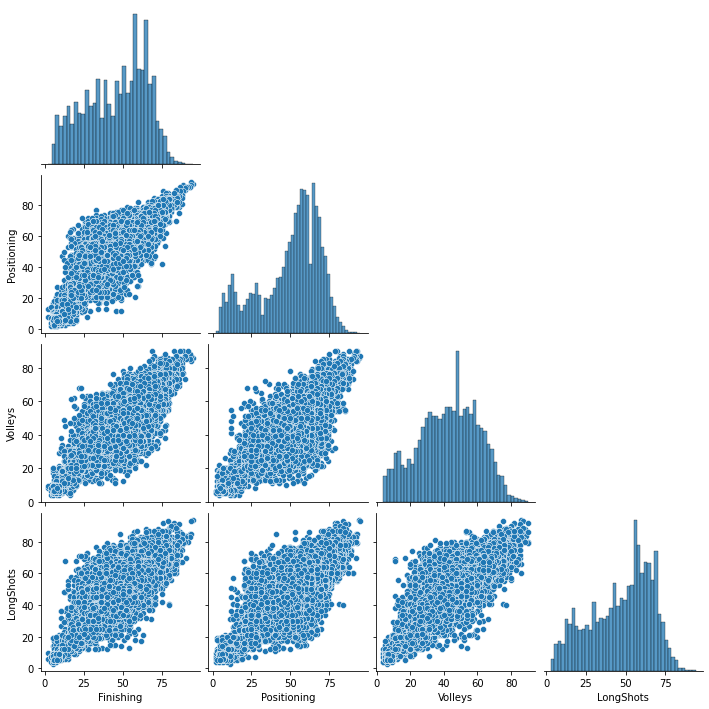

In [27]:
sns.pairplot(data=fifaframe_fin, vars=['Finishing', 'Positioning', 'Volleys', 'LongShots'], corner=True)
#print("Positioning:\n",fifaframe_fin["Positioning"].describe())
#print("Volleys:\n",fifaframe_fin["Volleys"].describe())
#print("LongShots:\n",fifaframe_fin["LongShots"].describe())

Since Positioning yields the highest correlation with respect to Finishing it is selected as strata feature.

In [28]:
fifaframe_binned = fifaframe_fin.copy()
fifaframe_binned['pos_bins'] = pd.qcut(fifaframe_binned['Positioning'], q=15, precision=0)

In [29]:
#bins = fifaframe_binned.groupby(["pos_bins"])['ID'].nunique()

In [30]:
grouped_fifaframe = fifaframe_binned.groupby(["pos_bins"])
variance_2_df = pd.DataFrame()
#using ks and iter from previous sampling
iter = iter
ks = ks
for j in range(len(ks)):
  size = ks[j]
  mean_values = np.empty((iter,1))
  for i in range(iter):
    sample = grouped_fifaframe.apply(lambda x: x.sample(frac=size))
    mean_values[i,0] = sample["Finishing"].mean()
  resultsdf = pd.DataFrame(mean_values, columns=["strat. Positioning"])
  variance_2_df[size] = resultsdf.var()
variance_2_df = pd.concat([variance_df, variance_2_df])

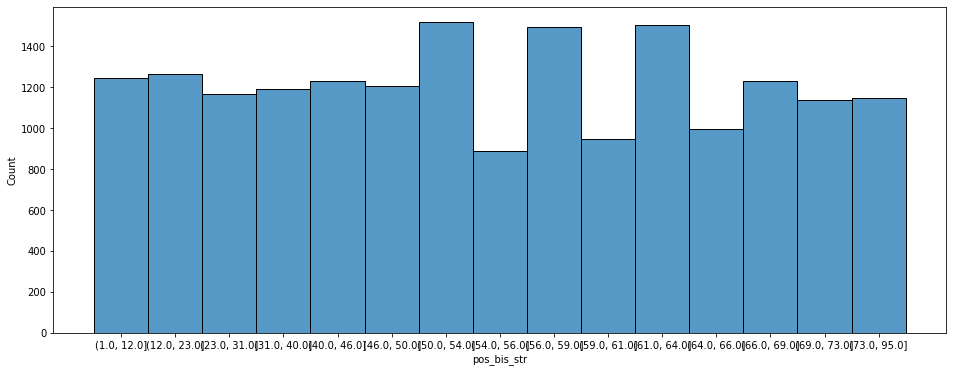

In [31]:
fifaframe_binned["pos_bis_str"] = fifaframe_binned["pos_bins"].astype(str)
fifaframe_binned.sort_values(['pos_bis_str'], inplace=True)
plt.subplots(figsize=(16,6))
sns.histplot(data=fifaframe_binned, x="pos_bis_str")

In [32]:
plt.subplots(figsize=(16,6))
sns.histplot(data=fifaframe_binned, x="Positioning")

In [33]:
variance_2_df[-3:]

0.01      0.02      0.05      0.10
strat.              0.439443  0.213936  0.098121  0.048814
SRS                 2.076369  1.063097  0.564811  0.168991
strat. Positioning  0.397797  0.241069  0.089434  0.045199

In [34]:
ks_num = [round(elem * int(fifaframe_fin.shape[0])) for elem in ks]
var = variance_2_df.T
fig, axs =  plt.subplots()
sns.lineplot(x = ks_num, y = var["strat."], label = "stratified SRS (Position)", marker = "o")
# sns.lineplot(x = ks_num, y = var["SRS"], label = "SRS", marker = "o")
sns.lineplot(x = ks_num, y = var["strat. Positioning"], label = "stratified SRS (Positioning)", marker = "o")
axs.set_axisbelow(True)
axs.set_title('mean {} variance'.format(value))
axs.set_xlabel("samplesize")
axs.set_ylabel("mean {} variance".format(value))

Text(0, 0.5, 'mean Finishing variance')